# hugging face for ocular

In [ ]:
!pip install -q datasets transformers accelerate timm
!pip install -q -U albumentations>=1.4.6 torchmetrics pycocotools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 71.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is 

Loading the dataset

In [ ]:
from huggingface_hub import notebook_login

In [ ]:
notebook_login()

In [ ]:
from datasets import load_dataset

In [ ]:
oculardataset = load_dataset("Alvin-Nahabwe/dsi", "ocular", trust_remote_code=True)

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
oculardataset

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 687
    })
    validation: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 192
    })
    test: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 92
    })
})

In [ ]:
oculardataset["test"][0]

{'image_id': 30,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3264x2448>,
 'width': 3264,
 'height': 2448,
 'objects': {'id': [190, 191, 192, 193, 194],
  'area': [24124, 39775, 39788, 4779, 4473],
  'bbox': [[1062.0, 1343.0, 148.0, 163.0],
   [1699.0, 832.0, 185.0, 215.0],
   [3010.0, 1136.0, 196.0, 203.0],
   [1499.0, 1476.0, 81.0, 59.0],
   [2136.0, 1228.0, 63.0, 71.0]],
  'category': [1, 1, 1, 0, 0]}}

In [ ]:
import gc
import torch

def clear_memory():
    gc.collect()
    torch.cuda.empty_cache()
clear_memory()

In [ ]:
# Installing required libraries
!pip install transformers datasets torch torchvision

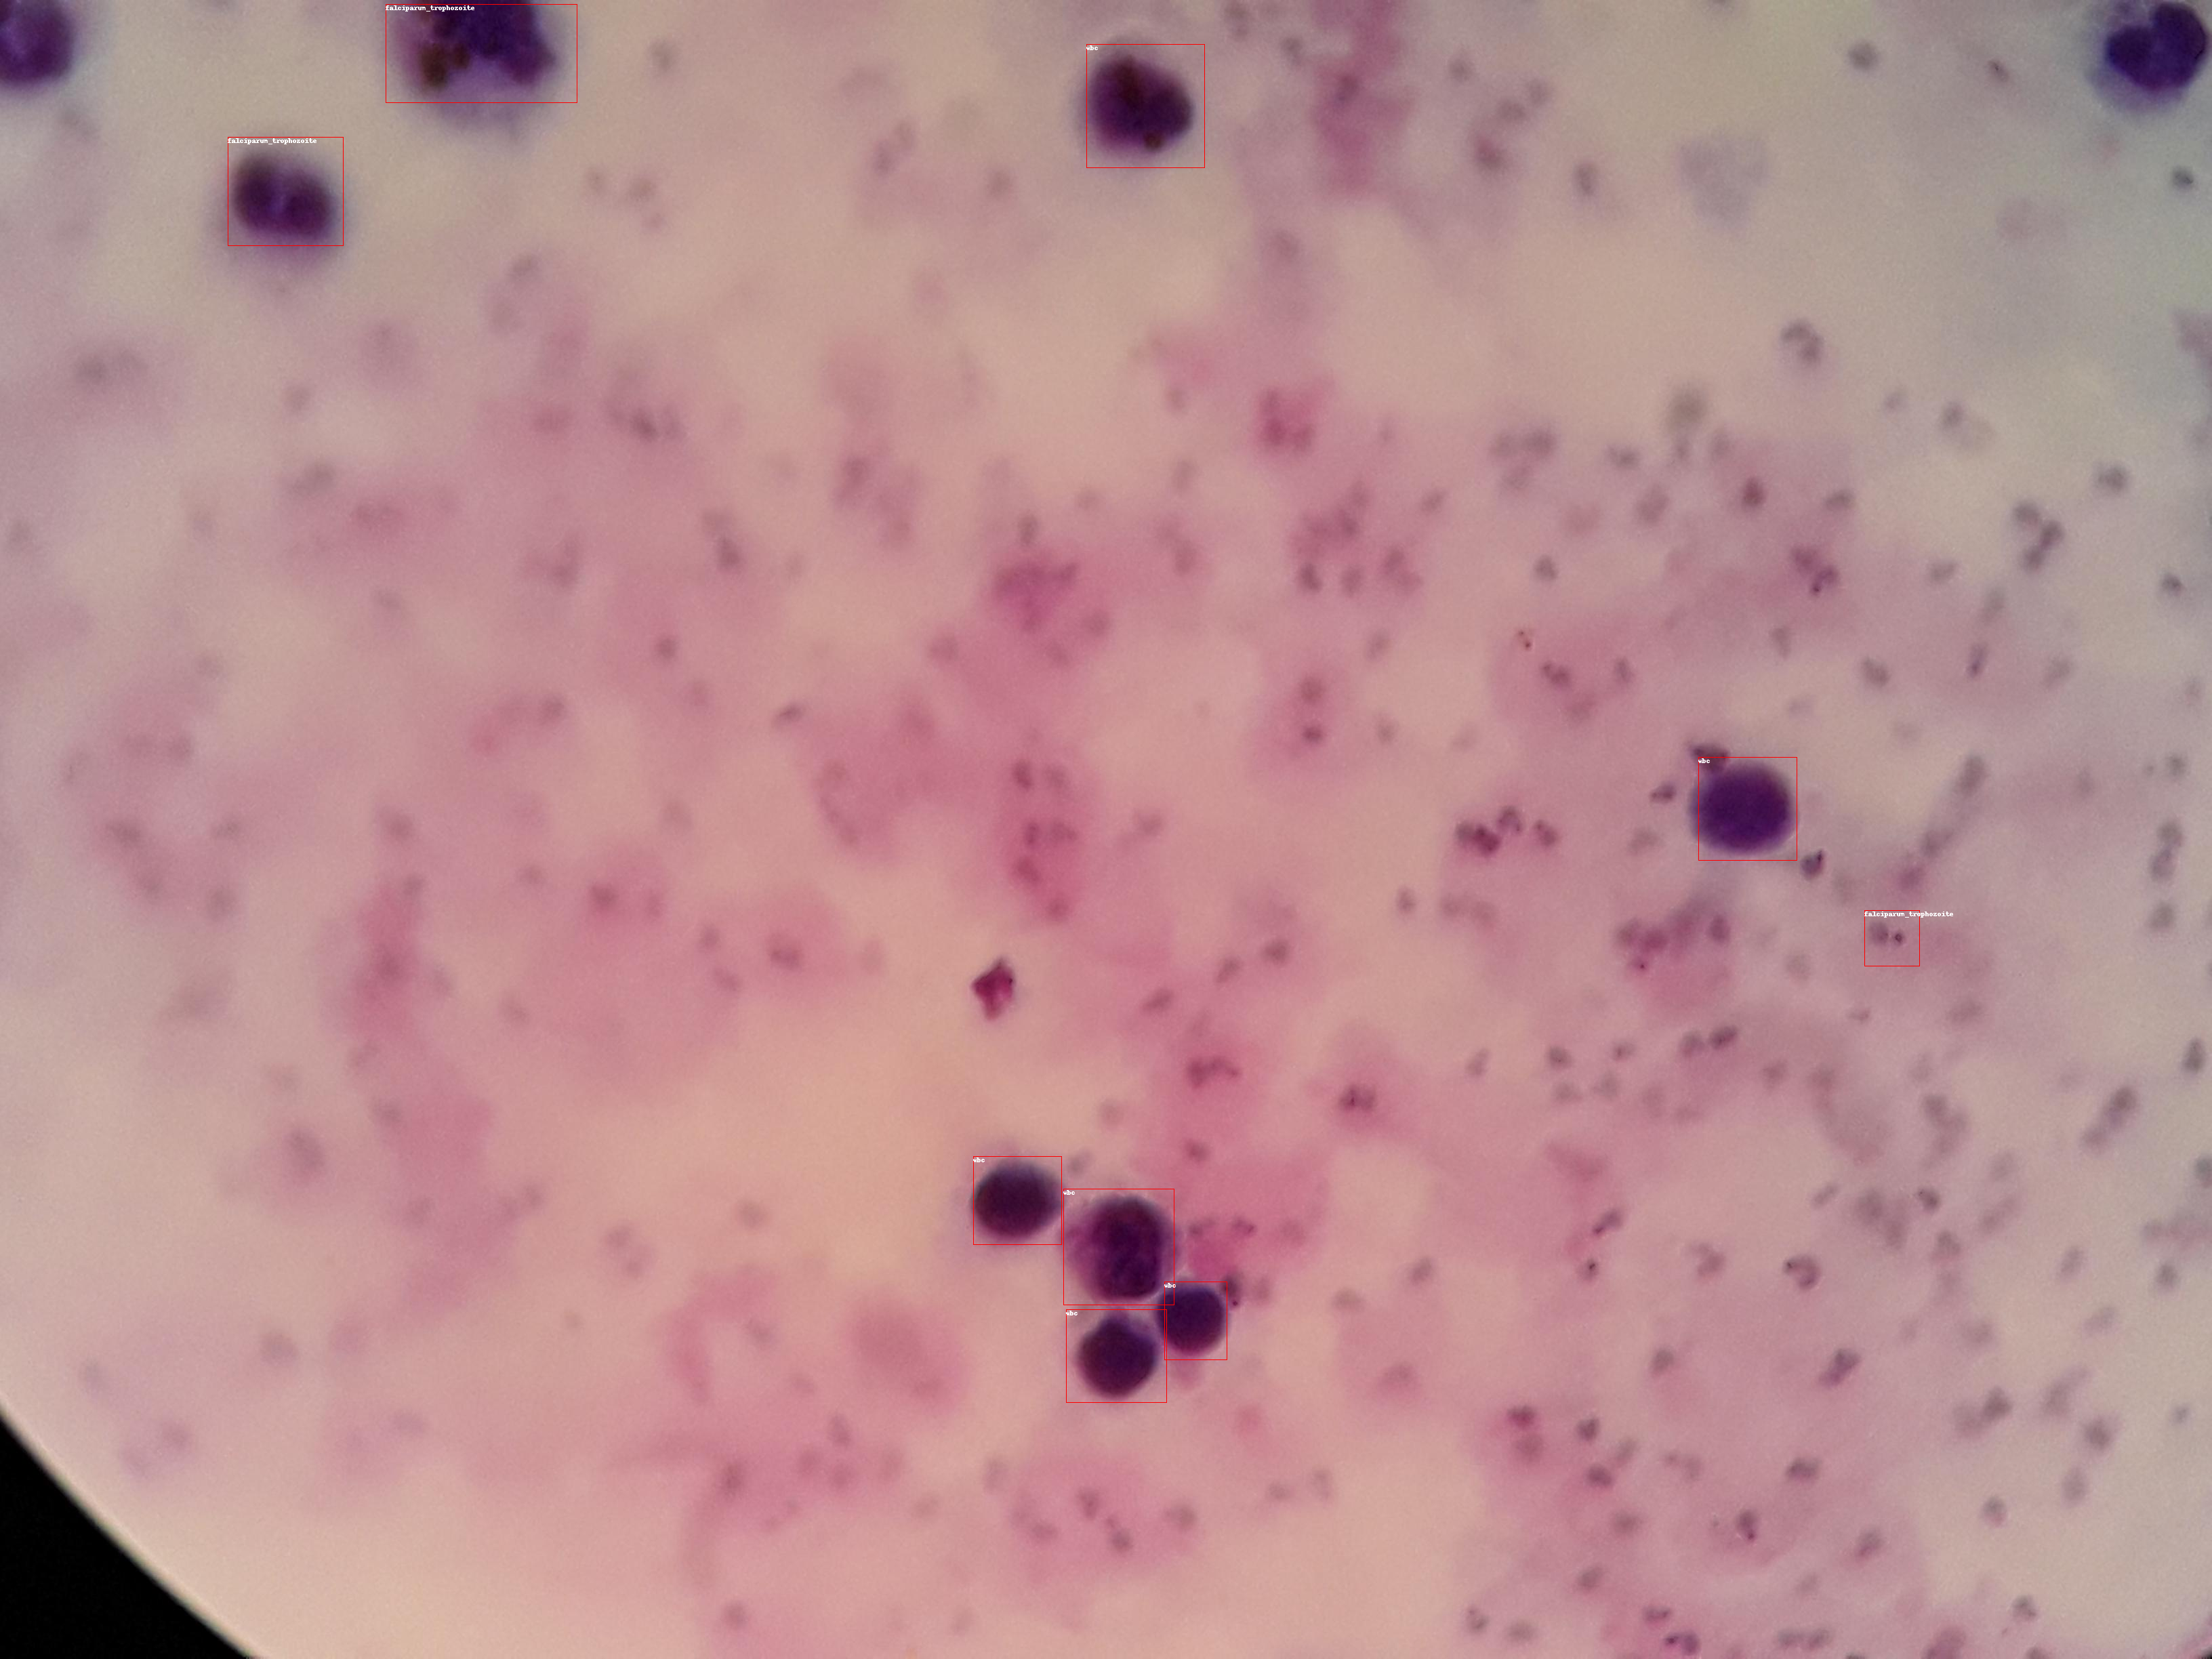

In [ ]:
import numpy as np
import os
from PIL import Image, ImageDraw

image = oculardataset["train"][2]["image"] #retrieving the third image from the training set
annotations = oculardataset["train"][2]["objects"]
draw = ImageDraw.Draw(image)

categories = oculardataset["train"].features["objects"].feature["category"].names

id2label = {index: x for index, x in enumerate(categories, start=0)}
label2id = {v: k for k, v in id2label.items()}

for i in range(len(annotations["id"])):
    box = annotations["bbox"][i]
    class_idx = annotations["category"][i]
    x, y, w, h = tuple(box)
# Check if coordinates are normalized or not
    if max(box) > 1.0:
 # Coordinates are un-normalized, no need to re-scale them
        x1, y1 = int(x), int(y)
        x2, y2 = int(x + w), int(y + h)
    else:
        # Coordinates are normalized, re-scale them
        x1 = int(x * width)
        y1 = int(y * height)
        x2 = int((x + w) * width)
        y2 = int((y + h) * height)
    draw.rectangle((x, y, x + w, y + h), outline="red", width=1)
    draw.text((x, y), id2label[class_idx], fill="white")

image

In [ ]:
#Import necessary modules
import torch
from transformers import ConditionalDetrForObjectDetection, ConditionalDetrImageProcessor
from datasets import load_dataset
from torchvision.transforms import transforms

In [ ]:
# Load pre-trained model and image processor
model = ConditionalDetrForObjectDetection.from_pretrained("microsoft/conditional-detr-resnet-50")
image_processor = ConditionalDetrImageProcessor.from_pretrained("microsoft/conditional-detr-resnet-50")

config.json:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/174M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

In [ ]:
# Import the AutoImageProcessor class from the transformers library
from transformers import AutoImageProcessor

# Defining the pre-trained model we want to use
MODEL_NAME = "microsoft/conditional-detr-resnet-50"

image_processor = AutoImageProcessor.from_pretrained(
    MODEL_NAME,
    do_pad=False,
    do_resize=False,
)

In [ ]:
import albumentations as A
IMAGE_SIZE = 480
max_size = IMAGE_SIZE

# Resize image longest edge to 480 and then pad image to square 480x480.
# This padding and resizing strategy give better results, see
# https://github.com/huggingface/transformers/pull/30422#discussion_r1584647408

basic_transforms = [
  #resizes the image so that the longest edge is the maximum size while maintainin the aspect ratio
    A.LongestMaxSize(max_size=max_size),
    A.PadIfNeeded(max_size, max_size, border_mode=0, value=(128, 128, 128), position="top_left"),
]

# Defines augmentations for training data
train_augment_and_transform = A.Compose(
    [
        A.Perspective(p=0.1),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.HueSaturationValue(p=0.1),
        *basic_transforms,
    ],

        # Parameters for bounding box transformation
    bbox_params=A.BboxParams(format="coco", label_fields=["category"], clip=True, min_area=25),
)

# transformations for validation data
validation_transform = A.Compose(
    basic_transforms,
    bbox_params=A.BboxParams(format="coco", label_fields=["category"], clip=True),
)

In [ ]:
def format_image_annotations_as_coco(image_id, categories, areas, bboxes):
    """Format one set of image annotations to the COCO format

    Args:
        image_id (str): image id. e.g. "0001"
        categories (List[int]): list of categories/class labels corresponding to provided bounding boxes
        areas (List[float]): list of corresponding areas to provided bounding boxes
        bboxes (List[Tuple[float]]): list of bounding boxes provided in COCO format
            ([center_x, center_y, width, height] in absolute coordinates)

    Returns:
        dict: {
            "image_id": image id,
            "annotations": list of formatted annotations
        }
    """

     # Initializing an empty list to store formatted annotations
    annotations = []

   # Iterate over each annotation
    for category, area, bbox in zip(categories, areas, bboxes):

     # Create a dictionary for each annotation in COCO format
        formatted_annotation = {
            "image_id": image_id,
            "category_id": category,
            "iscrowd": 0,
            "area": area,
            "bbox": list(bbox),
        }

      # Add the formatted annotation to the list
        annotations.append(formatted_annotation)


    # Return a dictionary containing the image ID and list of annotations

    return {
        "image_id": image_id,
        "annotations": annotations,
    }


In [ ]:
def augment_and_transform_batch(examples, transform, image_processor):
    """Apply augmentations and format annotations in COCO format for object detection task"""

    images = []
    annotations = []


    # Iterate over each example in the batch
    for image_id, image, objects in zip(examples["image_id"], examples["image"], examples["objects"]):
        image = np.array(image.convert("RGB"))

        # apply augmentations
        output = transform(image=image, bboxes=objects["bbox"], category=objects["category"])
        images.append(output["image"])

        # format annotations in COCO format
        formatted_annotations = format_image_annotations_as_coco(
            image_id, output["category"], objects["area"], output["bboxes"]
        )
        annotations.append(formatted_annotations)

    # Applying the image processor transformations: resizing, rescaling, normalization
    result = image_processor(images=images, annotations=annotations, return_tensors="pt")

    return result

In [ ]:
from functools import partial
import numpy as np

# Make transform functions for batch and apply for dataset splits
train_transform_batch = partial(
    augment_and_transform_batch, transform=train_augment_and_transform, image_processor=image_processor
)
validation_transform_batch = partial(
    augment_and_transform_batch, transform=validation_transform, image_processor=image_processor
)

# Apply transformations to dataset splits

oculardataset["train"] = oculardataset["train"].with_transform(train_transform_batch)
oculardataset["validation"] = oculardataset["validation"].with_transform(validation_transform_batch)
oculardataset["test"] = oculardataset["test"].with_transform(validation_transform_batch)

oculardataset["train"][15]

{'pixel_values': tensor([[[-0.0972, -0.0801, -0.0287,  ...,  0.1768,  0.1768,  0.1426],
          [-0.1314, -0.0801, -0.0801,  ...,  0.1083,  0.1426,  0.1254],
          [-0.0972, -0.0458, -0.0458,  ...,  0.0569,  0.1426,  0.1426],
          ...,
          [ 0.0741,  0.0741,  0.0741,  ...,  0.0741,  0.0741,  0.0741],
          [ 0.0741,  0.0741,  0.0741,  ...,  0.0741,  0.0741,  0.0741],
          [ 0.0741,  0.0741,  0.0741,  ...,  0.0741,  0.0741,  0.0741]],
 
         [[-0.7752, -0.7577, -0.7227,  ..., -0.5651, -0.5301, -0.5651],
          [-0.7927, -0.7577, -0.7577,  ..., -0.6352, -0.5651, -0.5826],
          [-0.8277, -0.7752, -0.7752,  ..., -0.6527, -0.4951, -0.4776],
          ...,
          [ 0.2052,  0.2052,  0.2052,  ...,  0.2052,  0.2052,  0.2052],
          [ 0.2052,  0.2052,  0.2052,  ...,  0.2052,  0.2052,  0.2052],
          [ 0.2052,  0.2052,  0.2052,  ...,  0.2052,  0.2052,  0.2052]],
 
         [[-0.4275, -0.4275, -0.3753,  ..., -0.1312, -0.0964, -0.1312],
          [-

In [ ]:
import torch

def collate_fn(batch):
    data = {}

     # Stack pixel values from all samples in the batch
    data["pixel_values"] = torch.stack([x["pixel_values"] for x in batch])

   # Collect labels from all samples
    data["labels"] = [x["labels"] for x in batch]

  # If pixel masks are present, stack them
    if "pixel_mask" in batch[0]:
        data["pixel_mask"] = torch.stack([x["pixel_mask"] for x in batch])
    return data


In [ ]:
from transformers.image_transforms import center_to_corners_format

def convert_bbox_yolo_to_pascal(boxes, image_size):
    """
    Convert bounding boxes from YOLO format (x_center, y_center, width, height) in range [0, 1]
    to Pascal VOC format (x_min, y_min, x_max, y_max) in absolute coordinates.

    Args:
        boxes (torch.Tensor): Bounding boxes in YOLO format
        image_size (Tuple[int, int]): Image size in format (height, width)

    Returns:
        torch.Tensor: Bounding boxes in Pascal VOC format (x_min, y_min, x_max, y_max)
    """
    # convert center to corners format
    boxes = center_to_corners_format(boxes)

    # convert to absolute coordinates
    height, width = image_size
    boxes = boxes * torch.tensor([[width, height, width, height]])

    return boxes

In [ ]:
import numpy as np
from dataclasses import dataclass
from torchmetrics.detection.mean_ap import MeanAveragePrecision
#defines a function to compute evaluation metrics

@dataclass
class ModelOutput:
    logits: torch.Tensor
    pred_boxes: torch.Tensor


@torch.no_grad()
def compute_metrics(evaluation_results, image_processor, threshold=0.0, id2label=None):
    """
    Compute mean average mAP, mAR and their variants for the object detection task.

    Args:
        evaluation_results (EvalPrediction): Predictions and targets from evaluation.
        threshold (float, optional): Threshold to filter predicted boxes by confidence. Defaults to 0.0.
        id2label (Optional[dict], optional): Mapping from class id to class name. Defaults to None.

    Returns:
        Mapping[str, float]: Metrics in a form of dictionary {<metric_name>: <metric_value>}
    """

    predictions, targets = evaluation_results.predictions, evaluation_results.label_ids

    # For metric computation we need to provide:
    #  - targets in a form of list of dictionaries with keys "boxes", "labels"
    #  - predictions in a form of list of dictionaries with keys "boxes", "scores", "labels"

    image_sizes = []
    post_processed_targets = []
    post_processed_predictions = []

    # Collect targets in the required format for metric computation
    for batch in targets:
        # collect image sizes, we will need them for predictions post processing
        batch_image_sizes = torch.tensor(np.array([x["orig_size"] for x in batch]))
        image_sizes.append(batch_image_sizes)
        # collect targets in the required format for metric computation
        # boxes were converted to YOLO format needed for model training
        # here we will convert them to Pascal VOC format (x_min, y_min, x_max, y_max)
        for image_target in batch:
            boxes = torch.tensor(image_target["boxes"])
            boxes = convert_bbox_yolo_to_pascal(boxes, image_target["orig_size"])
            labels = torch.tensor(image_target["class_labels"])
            post_processed_targets.append({"boxes": boxes, "labels": labels})

    # Collect predictions in the required format for metric computation,
    # model produce boxes in YOLO format, then image_processor convert them to Pascal VOC format
    for batch, target_sizes in zip(predictions, image_sizes):
        batch_logits, batch_boxes = batch[1], batch[2]
        output = ModelOutput(logits=torch.tensor(batch_logits), pred_boxes=torch.tensor(batch_boxes))
        post_processed_output = image_processor.post_process_object_detection(
            output, threshold=threshold, target_sizes=target_sizes
        )
        post_processed_predictions.extend(post_processed_output)

    # Compute metrics
    metric = MeanAveragePrecision(box_format="xyxy", class_metrics=True)
    metric.update(post_processed_predictions, post_processed_targets)
    metrics = metric.compute()

    # Replace list of per class metrics with separate metric for each class
    classes = metrics.pop("classes")
    map_per_class = metrics.pop("map_per_class")
    mar_100_per_class = metrics.pop("mar_100_per_class")
    for class_id, class_map, class_mar in zip(classes, map_per_class, mar_100_per_class):
        class_name = id2label[class_id.item()] if id2label is not None else class_id.item()
        metrics[f"map_{class_name}"] = class_map
        metrics[f"mar_100_{class_name}"] = class_mar

    metrics = {k: round(v.item(), 4) for k, v in metrics.items()}

    return metrics


eval_compute_metrics_fn = partial(
    compute_metrics, image_processor=image_processor, id2label=id2label, threshold=0.0
)

In [ ]:
from transformers import AutoModelForObjectDetection

model = AutoModelForObjectDetection.from_pretrained(
    MODEL_NAME,
    id2label=id2label,# Mapping from class IDs to class labels
    label2id=label2id,# Mapping from class labels to class IDs
    ignore_mismatched_sizes=True,
)

Some weights of ConditionalDetrForObjectDetection were not initialized from the model checkpoint at microsoft/conditional-detr-resnet-50 and are newly initialized because the shapes did not match:
- class_labels_classifier.bias: found shape torch.Size([91]) in the checkpoint and torch.Size([2]) in the model instantiated
- class_labels_classifier.weight: found shape torch.Size([91, 256]) in the checkpoint and torch.Size([2, 256]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

# Defining the training arguments for fine-tuning the mode
training_args = TrainingArguments(
    output_dir="detr_finetuned_oculardataset",
    num_train_epochs=30,
    fp16=False,
    per_device_train_batch_size=8,
    dataloader_num_workers=4,
    learning_rate=5e-5,
    lr_scheduler_type="cosine",
    weight_decay=1e-4,
    max_grad_norm=0.01,
    metric_for_best_model="eval_map",
    greater_is_better=True,
    load_best_model_at_end=True,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    remove_unused_columns=False,
    eval_do_concat_batches=False,
    push_to_hub=True,
)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=oculardataset["train"],
    eval_dataset=oculardataset["validation"],
    tokenizer=image_processor,
    data_collator=collate_fn,
    compute_metrics=eval_compute_metrics_fn,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: Runtime

TrainOutput(global_step=2580, training_loss=1.2423190449559411, metrics={'train_runtime': 4113.0981, 'train_samples_per_second': 5.011, 'train_steps_per_second': 0.627, 'total_flos': 3.702615946776576e+18, 'train_loss': 1.2423190449559411, 'epoch': 30.0})

In [ ]:
trainer.push_to_hub()

events.out.tfevents.1719567985.3b15823302a6.824.0:   0%|          | 0.00/41.2k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/marthakk/detr_finetuned_oculardataset/commit/c2daa8788d06855d27d835ca0fa1177221070766', commit_message='End of training', commit_description='', oid='c2daa8788d06855d27d835ca0fa1177221070766', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
from pprint import pprint

metrics = trainer.evaluate(eval_dataset=oculardataset["test"], metric_key_prefix="test")
pprint(metrics)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


{'epoch': 30.0,
 'test_loss': 1.0364841222763062,
 'test_map': 0.3023,
 'test_map_50': 0.5016,
 'test_map_75': 0.3619,
 'test_map_falciparum_trophozoite': 0.018,
 'test_map_large': -1.0,
 'test_map_medium': 0.6111,
 'test_map_small': 0.3023,
 'test_map_wbc': 0.5866,
 'test_mar_1': 0.0869,
 'test_mar_10': 0.3566,
 'test_mar_100': 0.412,
 'test_mar_100_falciparum_trophozoite': 0.1535,
 'test_mar_100_wbc': 0.6706,
 'test_mar_large': -1.0,
 'test_mar_medium': 0.7645,
 'test_mar_small': 0.4079,
 'test_runtime': 18.7719,
 'test_samples_per_second': 4.901,
 'test_steps_per_second': 0.639}


In [ ]:
import torch
import numpy as np
import albumentations as A
from PIL import Image
from transformers import AutoImageProcessor, AutoModelForObjectDetection
from google.colab import files

# Upload an image file
uploaded = files.upload()

# Get the filename of the uploaded image
filename = next(iter(uploaded))

# Open the uploaded image
image = Image.open(filename)

# Define the maximum size for resizing
max_size = 800

# Define transformations for inference
resize_and_pad = A.Compose([
    A.LongestMaxSize(max_size=max_size),
    A.PadIfNeeded(max_size, max_size, border_mode=0, value=(128, 128, 128), position="top_left"),
])

# This one is for visualization with no padding
resize_only = A.Compose([
    A.LongestMaxSize(max_size=max_size),
])

# Convert PIL Image to numpy array for Albumentations
image_np = np.array(image)

# Apply transformations
image_resized_padded = resize_and_pad(image=image_np)['image']
image_resized_only = resize_only(image=image_np)['image']

# Convert back to PIL Image for further processing or visualization
image_resized_padded_pil = Image.fromarray(image_resized_padded)
image_resized_only_pil = Image.fromarray(image_resized_only)

# You can now use these processed images for your object detection model

Saving 1596010470000_jpg.rf.c9b367633f71c9e307486a8177a24416.jpg to 1596010470000_jpg.rf.c9b367633f71c9e307486a8177a24416.jpg


In [ ]:
# Mount Google Drive
from google.colab import files, drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install timm
import timm

In [ ]:
device = "cuda"
model_repo = "/content/drive/MyDrive/ocularhuggingface/detr_finetuned_oculardataset"

image_processor = AutoImageProcessor.from_pretrained(model_repo)
model = AutoModelForObjectDetection.from_pretrained(model_repo)
model = model.to(device)

In [ ]:
np_preprocessed_image = resize_and_pad(image=np.array(image))["image"]

with torch.no_grad():
    inputs = image_processor(images=[np_preprocessed_image], return_tensors="pt")
    outputs = model(inputs["pixel_values"].to(device))
    target_sizes = torch.tensor([np_preprocessed_image.shape[:2]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.3, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Detected wbc with confidence 0.73 at location [165.84, 71.8, 206.16, 115.22]
Detected wbc with confidence 0.681 at location [201.37, 47.14, 246.05, 90.7]
Detected wbc with confidence 0.678 at location [173.76, 6.71, 221.57, 50.47]
Detected wbc with confidence 0.545 at location [381.43, 314.73, 424.84, 357.56]
Detected wbc with confidence 0.527 at location [377.57, 267.4, 420.46, 311.68]
Detected wbc with confidence 0.526 at location [126.05, 409.15, 163.3, 454.78]
Detected falciparum_trophozoite with confidence 0.436 at location [197.01, 200.8, 212.51, 216.98]
Detected falciparum_trophozoite with confidence 0.421 at location [625.65, 281.88, 641.96, 298.62]
Detected falciparum_trophozoite with confidence 0.42 at location [641.13, 311.34, 657.25, 328.55]
Detected falciparum_trophozoite with confidence 0.414 at location [219.3, 114.01, 236.38, 129.99]
Detected falciparum_trophozoite with confidence 0.409 at location [544.43, 71.8, 561.76, 88.23]
Detected falciparum_trophozoite with confi

In [ ]:
device = "cuda"
model_repo = "/content/detr_finetuned_oculardataset"

image_processor = AutoImageProcessor.from_pretrained(model_repo)
model = AutoModelForObjectDetection.from_pretrained(model_repo)
model = model.to(device)

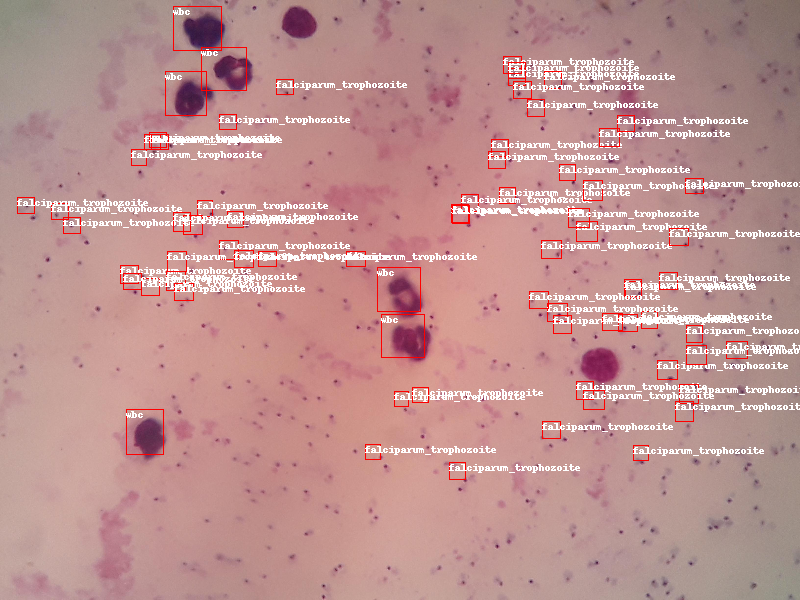

In [ ]:
from PIL import Image, ImageDraw
#plotting the results
resized_image = resize_only(image=np.array(image))["image"]
resized_image = Image.fromarray(resized_image)
draw = ImageDraw.Draw(resized_image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x, y, x2, y2 = tuple(box)
    draw.rectangle((x, y, x2, y2), outline="red", width=1)
    draw.text((x, y), model.config.id2label[label.item()], fill="white")

resized_image

In [ ]:
!zip -r /content/detr_finetuned_oculardataset.zip /content/detr_finetuned_oculardataset/

  adding: content/detr_finetuned_oculardataset/ (stored 0%)
  adding: content/detr_finetuned_oculardataset/checkpoint-2580/ (stored 0%)
  adding: content/detr_finetuned_oculardataset/checkpoint-2580/optimizer.pt (deflated 15%)
  adding: content/detr_finetuned_oculardataset/checkpoint-2580/preprocessor_config.json (deflated 59%)
  adding: content/detr_finetuned_oculardataset/checkpoint-2580/config.json (deflated 60%)
  adding: content/detr_finetuned_oculardataset/checkpoint-2580/scheduler.pt (deflated 56%)
  adding: content/detr_finetuned_oculardataset/checkpoint-2580/trainer_state.json (deflated 84%)
  adding: content/detr_finetuned_oculardataset/checkpoint-2580/model.safetensors (deflated 7%)
  adding: content/detr_finetuned_oculardataset/checkpoint-2580/rng_state.pth (deflated 25%)
  adding: content/detr_finetuned_oculardataset/checkpoint-2580/training_args.bin (deflated 51%)
  adding: content/detr_finetuned_oculardataset/preprocessor_config.json (deflated 59%)
  adding: content/detr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/detr_finetuned_oculardataset /content/drive/MyDrive/ocularhuggingface

In [ ]:
!pip install gradio
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.5 

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from transformers import pipeline

In [ ]:
import torch
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from transformers import AutoFeatureExtractor, AutoModelForObjectDetection
import gradio as gr

# Loading the model and feature extractor
model_name = "marthakk/detr_finetuned_oculardataset"
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
model = AutoModelForObjectDetection.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def predict_objects(image):
    # Converting Gradio image data to PIL Image
    if not isinstance(image, Image.Image):
        pil_image = Image.fromarray(image.astype('uint8'), 'RGB')
    else:
        pil_image = image

    # Preparing inputs
    inputs = feature_extractor(images=pil_image, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # run the image through the model to get predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Post-process outputs
    target_sizes = torch.tensor([pil_image.size[::-1]]).to(device)
    results = feature_extractor.post_process_object_detection(outputs, threshold=0.1, target_sizes=target_sizes)[0]

    # Print raw results for debugging
    print("Raw results:", results)

    # Create a drawing context
    draw = ImageDraw.Draw(pil_image)

    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", 16)
    except IOError:
        font = ImageFont.load_default()

    # Draw bounding boxes and labels on the image
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        print(f"Detected: {model.config.id2label[label.item()]} with score {score.item():.2f} at {box}")

        # Draw the bounding box
        draw.rectangle(box, outline="red", width=3)

        # Prepare the label text
        label_text = f"{model.config.id2label[label.item()]}: {score.item():.2f}"

        # Get text size
        #text_width, text_height = draw.textsize(label_text, font=font)

        left, top, right, bottom = draw.textbbox((0, 0), label_text, font=font)
        text_width = right - left
        text_height = bottom - top

        # Calculate position for text (just to the right of the box)
        text_x = box[2] + 5  # 5 pixels to the right of the box
        text_y = box[1]  # Aligned with the top of the box

        # Draw a semi-transparent background for the text
        draw.rectangle([text_x, text_y, text_x + text_width, text_y + text_height],
                       fill=(255, 255, 255, 180))

        # Draw the text
        draw.text((text_x, text_y), label_text, fill="red", font=font)

    # Convert PIL Image back to numpy array
    annotated_image = np.array(pil_image)

    return annotated_image

# Create Gradio interface
iface = gr.Interface(
    fn=predict_objects,
    inputs=gr.Image(label="Upload Image"),
    outputs=gr.Image(label="Annotated Image"),
    title="Object Detection with Conditional DETR",
    description="Upload an image to detect objects."
)

# Launch the interface
iface.launch(debug=True)

preprocessor_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/conditional_detr/feature_extraction_conditional_detr.py:38: FutureWarning: The class ConditionalDetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConditionalDetrImageProcessor instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/174M [00:00<?, ?B/s]

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://acb874e61f5590ee13.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Raw results: {'scores': tensor([0.2763, 0.2748, 0.2555, 0.2548, 0.2502, 0.2488, 0.2425, 0.2410, 0.2242,
        0.2231, 0.2228, 0.2220, 0.2214, 0.2189, 0.2174, 0.2160, 0.2147, 0.2144,
        0.2138, 0.2130, 0.2125, 0.2108, 0.2088, 0.2082, 0.2081, 0.2079, 0.2055,
        0.2035, 0.2031, 0.2026, 0.2024, 0.2024, 0.2017, 0.2010, 0.2008, 0.1998,
        0.1991, 0.1986, 0.1971, 0.1970, 0.1960, 0.1959, 0.1940, 0.1939, 0.1932,
        0.1931, 0.1929, 0.1916, 0.1908, 0.1902, 0.1886, 0.1885, 0.1881, 0.1873,
        0.1845, 0.1838, 0.1831, 0.1816, 0.1810, 0.1804, 0.1796, 0.1775, 0.1771,
        0.1769, 0.1761, 0.1760, 0.1747, 0.1741, 0.1735, 0.1734, 0.1731, 0.1721,
        0.1720, 0.1715, 0.1710, 0.1681, 0.1670, 0.1663, 0.1639, 0.1636, 0.1628,
        0.1627, 0.1624, 0.1616, 0.1603, 0.1596, 0.1590, 0.1588, 0.1586, 0.1583,
        0.1581, 0.1580, 0.1567, 0.1567, 0.1544, 0.1534, 0.1530, 0.1527, 0.1526,
        0.1526], device='cuda:0'), 'labels': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0